# Model Preprocessing 

In [271]:
# importing libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
from scipy import stats as stats
from sklearn.metrics import precision_score, recall_score, confusion_matrix,ConfusionMatrixDisplay,classification_report
from sklearn.model_selection import train_test_split, GridSearchCV,\
cross_val_score, RandomizedSearchCV
from sklearn.compose import ColumnTransformer

# model preprocessing libraries 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MaxAbsScaler
from sklearn.compose import ColumnTransformer

# algorithm imports 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

In [99]:
# reading data for model preprocessing 
gamers_df = pd.read_csv('Data/preprocessed_data',index_col=0)
gamers_df

,GAD1,GAD2,GAD3,GAD4,GAD5,GAD6,GAD7,GADE,Game,Platform,...,streams,Gender,Age,Work,Degree,Birthplace,Residence,Playstyle,GAD_T,anxiety
S. No.,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,1,0,0,Not difficult at all,Skyrim,"Console (PS, Xbox, ...)",...,0.0,Male,25,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Singleplayer,1,minimal anxiety
2,1,2,2,2,0,1,0,Somewhat difficult,Other,PC,...,2.0,Male,41,Unemployed / between jobs,Bachelor (or equivalent),USA,USA,Multiplayer - online - with strangers,8,mild anxiety
3,0,2,2,0,0,3,1,Not difficult at all,Other,PC,...,0.0,Female,32,Employed,Bachelor (or equivalent),Germany,Germany,Singleplayer,8,mild anxiety
4,0,0,0,0,0,0,0,Not difficult at all,Other,PC,...,5.0,Male,28,Employed,Bachelor (or equivalent),USA,USA,Multiplayer - online - with online acquaintanc...,0,minimal anxiety
5,2,1,2,2,2,3,2,Very difficult,Other,"Console (PS, Xbox, ...)",...,1.0,Male,19,Employed,High school diploma (or equivalent),USA,South Korea,Multiplayer - online - with strangers,14,moderate anxiety
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14246,1,0,0,1,0,1,1,Not difficult at all,Other,"Console (PS, Xbox, ...)",...,10.0,Male,22,Student at college / university,Master (or equivalent),France,France,Multiplayer - online - with strangers,4,minimal anxiety
14247,3,3,3,3,2,3,3,Extremely difficult,League of Legends,PC,...,20.0,Female,20,Student at college / university,High school diploma (or equivalent),USA,USA,Multiplayer - online - with strangers,20,severe anxiety
14248,0,0,0,0,0,0,0,Not difficult at all,Starcraft 2,PC,...,14.0,Male,19,Student at college / university,High school diploma (or equivalent),Norway,Norway,Multiplayer - online - with real life friends,0,minimal anxiety


In [100]:
# looking at the different data types within the dataset 
gamers_df.dtypes

GAD1            int64
GAD2            int64
GAD3            int64
GAD4            int64
GAD5            int64
GAD6            int64
GAD7            int64
GADE           object
Game           object
Platform       object
Hours         float64
earnings       object
whyplay        object
streams       float64
Gender         object
Age             int64
Work           object
Degree         object
Birthplace     object
Residence      object
Playstyle      object
GAD_T           int64
anxiety        object
dtype: object

In [101]:
gamers_df.isna().sum()

GAD1            0
GAD2            0
GAD3            0
GAD4            0
GAD5            0
GAD6            0
GAD7            0
GADE          590
Game            0
Platform        0
Hours          22
earnings        0
whyplay         0
streams        81
Gender          0
Age             0
Work           34
Degree          0
Birthplace      0
Residence       0
Playstyle       0
GAD_T           0
anxiety         0
dtype: int64

### Data Preprocessing Workflow 

From our earlier EDA work, we identified several different strategies for dealing with NaN values in our dataset. 
- `GADE` NaN values should be imputed with "Did not answer"
- `Hours` NaN values should be imputed using the `IterativeImputer` class
- `streams` NaN values should be imputed with 0 
- `Work` NaN values should be imputed using the `IterativeImputer` class
- `Residence_ISO3` and `Birthplace_ISO3` NaN values should be imputed with 'AAA' to reflect 'Unknown' values in their corresponding columns. 

### Data Preprocessing Pipelines 

**Why pipelines?**

In [102]:
# pipeline to replace NaNs in 'GADE' and 'Work' columns with 'Did not answer'
survey_pipeline = Pipeline([('obj_imputer', SimpleImputer(strategy='constant',fill_value='Did not answer'))])

# pipeline to replace NaNs in 'Hours and 'streams' with median value 
game_habits_pipeline = Pipeline([('numimputer', IterativeImputer(initial_strategy='median',random_state=42))])

In [103]:
survey_pipeline

Pipeline(steps=[('obj_imputer',
                 SimpleImputer(fill_value='Did not answer',
                               strategy='constant'))])

In [104]:
game_habits_pipeline

Pipeline(steps=[('numimputer',
                 IterativeImputer(initial_strategy='median', random_state=42))])

## Building a Baseline Model 

Before we ...

In [105]:
# splitting our dataset to predictor and target variables
X = gamers_df.drop(columns = ['anxiety','GAD_T'])
y = gamers_df['anxiety']

In [106]:
# viewing the distribution of class values 
y.value_counts(normalize=True)

minimal anxiety     0.555067
mild anxiety        0.271355
moderate anxiety    0.119506
severe anxiety      0.054072
Name: anxiety, dtype: float64

In [107]:
# label encoding our target variable 
lab_enc = LabelEncoder()
y = lab_enc.fit_transform(y)

In [108]:
target_labels = ['minimal anxiety','mild anxiety','moderate anxiety','severe anxiety']

In [109]:
# train-test splitting our data before imputation 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25,random_state=42)

In [110]:
# looking at the NaNs in training set 
X_train.isna().sum()

GAD1            0
GAD2            0
GAD3            0
GAD4            0
GAD5            0
GAD6            0
GAD7            0
GADE          446
Game            0
Platform        0
Hours          19
earnings        0
whyplay         0
streams        67
Gender          0
Age             0
Work           28
Degree          0
Birthplace      0
Residence       0
Playstyle       0
dtype: int64

In [111]:
# writing a ColumnTransformer object with our imputation pipelines 
preprocess_ct = ColumnTransformer(
    [("obj_imputer", survey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams'])])
preprocess_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('obj_imputer',
                                                  SimpleImputer(fill_value='Did '
                                                                           'not '
                                                                           'answer',
                                                                strategy='constant'))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams'])])

In [112]:
baseline_pipe = Pipeline([('preprocess', ct),
                      ('model', DummyClassifier(strategy='stratified',random_state=42))])
baseline_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('obj_imputer',
                                                                   SimpleImputer(fill_value='Did '
                                                                                            'not '
                                                                                            'answer',
                                                                                 strategy='constant'))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams'])])),
                ('model',
                 DummyClassifier(random_state=42, strategy='stratified'))])

In [113]:
baseline_pipe.fit(X_train,y_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('obj_imputer',
                                                                   SimpleImputer(fill_value='Did '
                                                                                            'not '
                                                                                            'answer',
                                                                                 strategy='constant'))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams'])])),
                ('model',
                 DummyClassifier(random_state=42, strategy='stratified'))])

In [122]:
base_y_pred = baseline_pipe.predict(X_test)

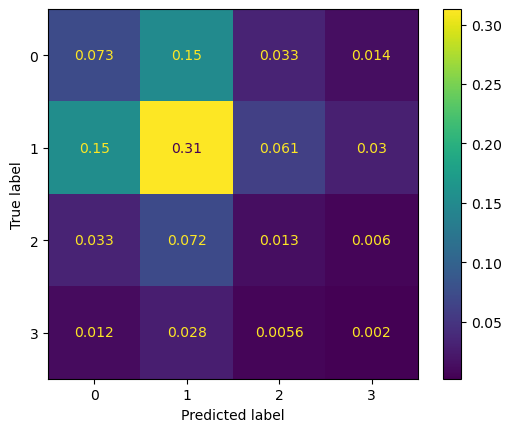

In [123]:
# confusion matrix for baseline DummyClassifier model 
ConfusionMatrixDisplay.from_predictions(y_test,y_pred, normalize='all')

In [124]:
print(classification_report(y_test,y_pred,target_names=target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.27      0.27      0.27       817
    mild anxiety       0.55      0.56      0.56      1683
moderate anxiety       0.11      0.10      0.11       373
  severe anxiety       0.04      0.04      0.04       142

        accuracy                           0.40      3015
       macro avg       0.24      0.24      0.24      3015
    weighted avg       0.40      0.40      0.40      3015



### Baseline Model Conclusions 

**Conclusion**:

## Model I | Logistic Regression

In [117]:
ohe_cols = ['GADE','Game','Platform','earnings','whyplay','Gender','Work','Degree','Birthplace','Residence','Playstyle']

In [118]:
# feature selection 
non_predict_cols = ['anxiety','GAD_T']
X_1 = gamers_df.drop(columns=non_predict_cols)
y_1 = gamers_df['anxiety']

In [119]:
# label encoding our target variable 
y_1 = lab_enc.fit_transform(y_1)

In [120]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X_1, y_1, test_size = 0.25,random_state=42)

#### Feature Engineering Pipelines 

In [146]:
age_pipeline = Pipeline([('agenorm',StandardScaler())])
survey_pipeline = Pipeline([('ohe_transform', OneHotEncoder(sparse_output=False,handle_unknown='ignore'))])

In [147]:
log_ct = ColumnTransformer(
    [("obj_imputer", survey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams']),
     ('age_pipe', age_pipeline, ['Age']),
     ('survey_pipe', survey_pipeline, ohe_cols)
    ])
log_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams']),
                                ('age_pipe',
                                 Pipeline(steps=[('agenorm',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('survey_pipe',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Game', 'Platform', 'earnings',
                                  'whyplay', 'Gender', 'Work', 'Degree',
                                  'Birthplace', 'Residence', 'Playstyle'])])

In [148]:
# logistic regression pipeline with all features standardized 
log_pipe = Pipeline([('preprocess', log_ct),
     ('model',
      LogisticRegression(random_state=42,max_iter=10000))])
log_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [149]:
log_pipe.fit(X1_train, y1_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', LogisticRegression(max_iter=10000, random_state=42))])

In [150]:
log_y_pred = log_pipe.predict(X1_test)

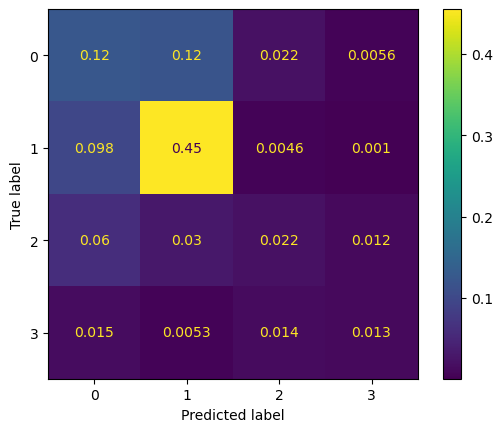

In [94]:
ConfusionMatrixDisplay.from_predictions(y1_test,log_y_pred, normalize='all')

In [97]:
print(classification_report(y1_test,log_y_pred, target_names=target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.42      0.46      0.44       817
    mild anxiety       0.75      0.81      0.78      1683
moderate anxiety       0.35      0.17      0.23       373
  severe anxiety       0.40      0.27      0.32       142

        accuracy                           0.61      3015
       macro avg       0.48      0.43      0.44      3015
    weighted avg       0.59      0.61      0.60      3015



### Model Evaluation 

### Logistic Regression Hyperparameter Tuning 

## Model II | Decision Trees 

In [215]:
# separating our target and predictor variables 
X_2 = gamers_df.drop(columns=non_predict_cols)
y_2 = gamers_df['anxiety']

In [216]:
# label encoding our target variable 
y_2 = lab_enc.fit_transform(y_2)

In [217]:
# splitting our data into training and test set 
X2_train, X2_test, y2_train, y2_test = train_test_split(X_2, y_2, test_size = 0.25,random_state=42)

In [218]:
dt_ct = ColumnTransformer(
    [("obj_imputer", survey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams']),
     ('age_pipe', age_pipeline, ['Age']),
     ('survey_pipe', survey_pipeline, ohe_cols)
    ])
dt_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams']),
                                ('age_pipe',
                                 Pipeline(steps=[('agenorm',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('survey_pipe',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Game', 'Platform', 'earnings',
                                  'whyplay', 'Gender', 'Work', 'Degree',
                                  'Birthplace', 'Residence', 'Playstyle'])])

In [219]:
# DecisionTree pipeline with all features standardized 
dt_pipe = Pipeline([('preprocess', dt_ct),
     ('model',
      DecisionTreeClassifier(random_state=42))])
dt_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [220]:
dt_pipe.fit(X2_train,y2_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', DecisionTreeClassifier(random_state=42))])

In [221]:
dt_y_pred = dt_pipe.predict(X2_test)

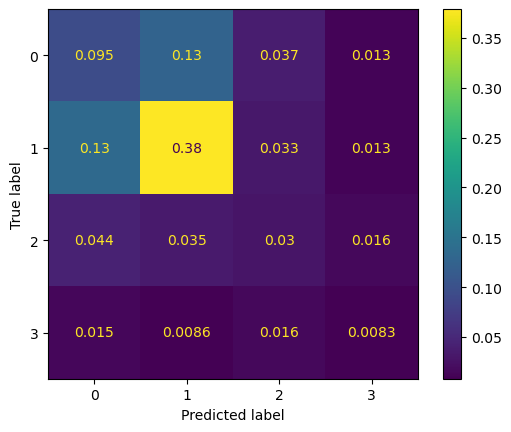

In [222]:
ConfusionMatrixDisplay.from_predictions(y2_test,dt_y_pred, normalize='all')

In [223]:
print(classification_report(y1_test,dt_y_pred, target_names=target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.33      0.35      0.34       817
    mild anxiety       0.69      0.68      0.68      1683
moderate anxiety       0.26      0.24      0.25       373
  severe anxiety       0.17      0.18      0.17       142

        accuracy                           0.51      3015
       macro avg       0.36      0.36      0.36      3015
    weighted avg       0.51      0.51      0.51      3015



### Model Evaluation 

### Decision Tree  Hyperparameter Tuning 

## Model III | Random Forest 

In [226]:
# separating our target and predictor variables 
X_3 = gamers_df.drop(columns=non_predict_cols)
y_3 = gamers_df['anxiety']

In [227]:
# label encoding our target variable 
y_3 = lab_enc.fit_transform(y_3)

In [228]:
# splitting our data into training and test set 
X3_train, X3_test, y3_train, y3_test = train_test_split(X_3, y_3, test_size = 0.25,random_state=42)

In [229]:
rf_ct = ColumnTransformer(
    [("obj_imputer", survey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams']),
     ('age_pipe', age_pipeline, ['Age']),
     ('survey_pipe', survey_pipeline, ohe_cols)
    ])
rf_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams']),
                                ('age_pipe',
                                 Pipeline(steps=[('agenorm',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('survey_pipe',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Game', 'Platform', 'earnings',
                                  'whyplay', 'Gender', 'Work', 'Degree',
                                  'Birthplace', 'Residence', 'Playstyle'])])

In [231]:
# RandomForest pipeline with all features standardized 
rf_pipe = Pipeline([('preprocess', rf_ct),
     ('model',
      RandomForestClassifier(random_state=42))])
rf_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [232]:
rf_pipe.fit(X3_train, y3_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [233]:
rf_y_pred = rf_pipe.predict(X3_test)

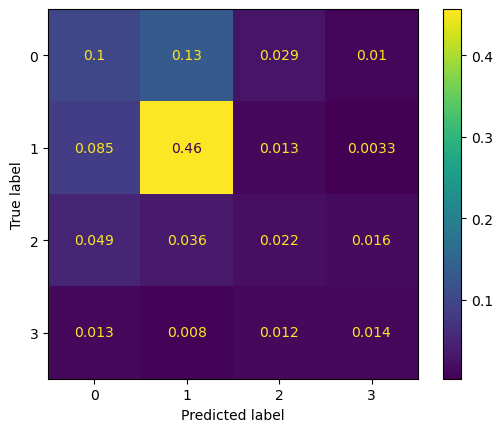

In [234]:
ConfusionMatrixDisplay.from_predictions(y3_test, rf_y_pred, normalize='all')

In [235]:
print(classification_report(y3_test, rf_y_pred, target_names = target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.40      0.37      0.39       817
    mild anxiety       0.72      0.82      0.77      1683
moderate anxiety       0.29      0.18      0.22       373
  severe anxiety       0.32      0.29      0.30       142

        accuracy                           0.59      3015
       macro avg       0.43      0.41      0.42      3015
    weighted avg       0.56      0.59      0.57      3015



### Model Evaluation 

### Random Forest Hyperparameter Tuning 

## Model IV | Naive Bayes

In [248]:
# separating our target and predictor variables 
X_4 = gamers_df.drop(columns=non_predict_cols)
y_4 = gamers_df['anxiety']

In [249]:
# label encoding our target variable 
y_4 = lab_enc.fit_transform(y_4)

In [250]:
# splitting our data into training and test set 
X4_train, X4_test, y4_train, y4_test = train_test_split(X_4, y_4, test_size = 0.25,random_state=42)

In [251]:
nb_ct = ColumnTransformer(
    [("obj_imputer", survey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams']),
     ('age_pipe', age_pipeline, ['Age']),
     ('survey_pipe', survey_pipeline, ohe_cols)
    ])
nb_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams']),
                                ('age_pipe',
                                 Pipeline(steps=[('agenorm',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('survey_pipe',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Game', 'Platform', 'earnings',
                                  'whyplay', 'Gender', 'Work', 'Degree',
                                  'Birthplace', 'Residence', 'Playstyle'])])

In [252]:
# Naive Bayes Classification pipeline with all features standardized 
nb_pipe = Pipeline([('preprocess', nb_ct),
     ('model',
      GaussianNB())])
nb_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', GaussianNB())])

In [253]:
nb_pipe.fit(X4_train,y4_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', GaussianNB())])

In [255]:
nb_y_pred = nb_pipe.predict(X4_test)

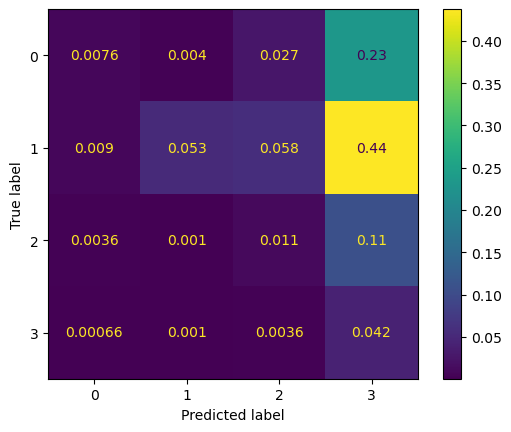

In [256]:
ConfusionMatrixDisplay.from_predictions(y4_test, nb_y_pred, normalize='all')

In [259]:
print(classification_report(y4_test, nb_y_pred, target_names = target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.37      0.03      0.05       817
    mild anxiety       0.90      0.10      0.17      1683
moderate anxiety       0.11      0.09      0.10       373
  severe anxiety       0.05      0.89      0.10       142

        accuracy                           0.11      3015
       macro avg       0.36      0.28      0.11      3015
    weighted avg       0.62      0.11      0.13      3015



### Model Evaluation 

### Naive BayesHyperparameter Tuning 

## Model V | K-Nearest Neighbors Classification 

In [260]:
# separating our target and predictor variables 
X_5 = gamers_df.drop(columns=non_predict_cols)
y_5 = gamers_df['anxiety']

In [261]:
# label encoding our target variable 
y_5 = lab_enc.fit_transform(y_5)

In [262]:
# splitting our data into training and test set 
X5_train, X5_test, y5_train, y5_test = train_test_split(X_5, y_5, test_size = 0.25,random_state=42)

In [263]:
knn_ct = ColumnTransformer(
    [("obj_imputer", survey_pipeline, ['GADE','Work']), 
     ("numimputer", game_habits_pipeline, ['Hours','streams']),
     ('age_pipe', age_pipeline, ['Age']),
     ('survey_pipe', survey_pipeline, ohe_cols)
    ])
knn_ct

ColumnTransformer(transformers=[('obj_imputer',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Work']),
                                ('numimputer',
                                 Pipeline(steps=[('numimputer',
                                                  IterativeImputer(initial_strategy='median',
                                                                   random_state=42))]),
                                 ['Hours', 'streams']),
                                ('age_pipe',
                                 Pipeline(steps=[('agenorm',
                                                  StandardScaler())]),
                                 ['Age']),
                                ('survey_pipe',
                                 Pipeline(steps=[('ohe_transform',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['GADE', 'Game', 'Platform', 'earnings',
                                  'whyplay', 'Gender', 'Work', 'Degree',
                                  'Birthplace', 'Residence', 'Playstyle'])])

In [264]:
# K-Nearest Neighbors Classification pipeline with all features standardized 
knn_pipe = Pipeline([('preprocess', knn_ct),
     ('model',
      GaussianNB())])
knn_pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', GaussianNB())])

In [265]:
knn_pipe.fit(X5_train,y5_train)

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('obj_imputer',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Work']),
                                                 ('numimputer',
                                                  Pipeline(steps=[('numimputer',
                                                                   IterativeImputer(initial_strategy='median',
                                                                                    random_state=42))]),
                                                  ['Hours', 'streams']),
                                                 ('age_pipe',
                                                  Pipeline(steps=[('agenorm',
                                                                   StandardScaler())]),
                                                  ['Age']),
                                                 ('survey_pipe',
                                                  Pipeline(steps=[('ohe_transform',
                                                                   OneHotEncoder(handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['GADE', 'Game', 'Platform',
                                                   'earnings', 'whyplay',
                                                   'Gender', 'Work', 'Degree',
                                                   'Birthplace', 'Residence',
                                                   'Playstyle'])])),
                ('model', GaussianNB())])

In [266]:
knn_y_pred = knn_pipe.predict(X5_test)

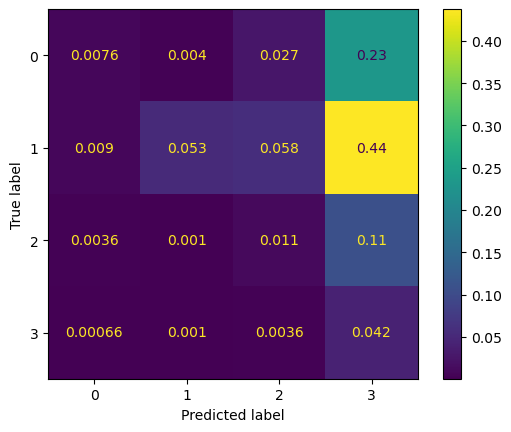

In [267]:
ConfusionMatrixDisplay.from_predictions(y5_test, knn_y_pred, normalize='all')

In [269]:
print(classification_report(y5_test, knn_y_pred, target_names = target_labels))

                  precision    recall  f1-score   support

 minimal anxiety       0.37      0.03      0.05       817
    mild anxiety       0.90      0.10      0.17      1683
moderate anxiety       0.11      0.09      0.10       373
  severe anxiety       0.05      0.89      0.10       142

        accuracy                           0.11      3015
       macro avg       0.36      0.28      0.11      3015
    weighted avg       0.62      0.11      0.13      3015



### Model Evaluation 

### K-Nearest Neighbors Hyperparameter Tuning 

# Model Preprocessing (without Pipelines) 

In [ ]:
# replacing NaN values in GADE with 'Did not answer'
X_train['GADE'].fillna('Did not answer',inplace=True)

# viewing new distribution of values in training set 
X_train['GADE'].value_counts()

In [ ]:
# replacing NaN values in Residence_ISO3 with 'AAA'
X_train['Residence_ISO3'].fillna('AAA',inplace=True)

In [ ]:
# replacing NaN values in Birthplace_ISO3 with 'AAA'
X_train['Birthplace_ISO3'].fillna('AAA',inplace=True)

In [ ]:
# viewing the distribution of values, including NaN for 'Work'
X_train['Work'].value_counts(dropna=False)

In [ ]:
# replacing 'Work' records where NaN appears with 'Did not answer'
X_train['Work'].fillna('Did not answer',inplace=True)

#### Iterative Imputation of `Hours` and `streams`

In [ ]:
# viewing which values still need to be imputed 
X_train.isna().sum()

In [ ]:
# instantiating IterativeImputer to calculate 
iter_impute = IterativeImputer(initial_strategy='median',random_state=42)

# fitting IterativeImputer on training set then applying transformation 
# subsetting the columns to iteratively impute on 
X_train[['Hours','streams']] = iter_impute.fit_transform(X_train[['Hours','streams']])

Now that we've cleaned up the training set, time to apply the same transformations on the test set

In [ ]:
X_test.isna().sum()

In [ ]:
# replacing NaN values in GADE with 'Did not answer'
X_test['GADE'].fillna('Did not answer',inplace=True)

# viewing new distribution of values in training set 
X_test['GADE'].value_counts()

In [ ]:
# replacing NaN values in Residence_ISO3 with 'AAA'
X_test['Residence_ISO3'].fillna('AAA',inplace=True)

In [ ]:
# replacing NaN values in Residence_ISO3 with 'AAA'
X_test['Birthplace_ISO3'].fillna('AAA',inplace=True)

In [ ]:
X_test['Work'].fillna('Did not answer',inplace=True)

In [ ]:
X_test[['Hours','streams']] = iter_impute.transform(X_test[['Hours','streams']])

### Baseline Dummy Classifier 

In [ ]:
# instantiating Dummy Classifier 
dummy_clf = DummyClassifier(strategy='stratified',random_state=42)

# fitting DummyClassifier to training set 
dummy_clf.fit(X_train, y_train)

# predicting values on test set with DummyClassifier 
base_y_pred = dummy_clf.predict(X_test)

# creating confusion matrix between y_test and y_pred 
ConfusionMatrixDisplay.from_predictions(y_test,base_y_pred,normalize='all')

In [ ]:
# classification report for baseline DummyClassifier 
print(classification_report(y_test,base_y_pred, target_names=target_labels))